In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

## loading data

In [2]:
uber = pd.read_csv('/content/uber.csv')
uber.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [4]:
uber.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [5]:
uber_2 = uber.drop(['Unnamed: 0','key'],axis=1)
uber_2.dropna(axis=0,inplace=True)

## Calculate the distance between the pickup and drop co-ordinates using the Haversine formual for accuracy
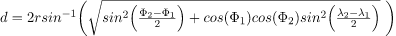

In [6]:
def haversine (lon_1, lon_2, lat_1, lat_2):
    
    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2])  #Degrees to Radians
    
    
    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1
    

    km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 + 
                                      np.cos(lat_1) * np.cos(lat_2) * np.sin(diff_lon/2.0)**2))
    
    return km

In [7]:
uber_2['Distance']= haversine(uber_2['pickup_longitude'],uber_2['dropoff_longitude'],
                             uber_2['pickup_latitude'],uber_2['dropoff_latitude'])

uber_2['Distance'] = uber_2['Distance'].astype(float).round(2)

In [8]:
uber_2.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.68
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.46
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.04
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.66
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.48


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'distance vs fare')

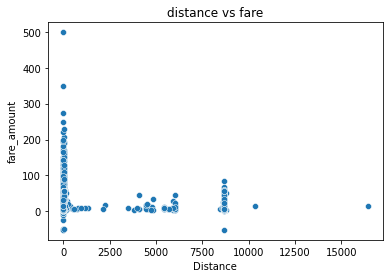

In [9]:
sns.scatterplot(uber_2['Distance'], uber_2['fare_amount'])
plt.title('distance vs fare')

## statistics for detect outlier

In [10]:
uber_2.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543,20.855349
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995,382.964645
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,1.220000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,2.120000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,3.880000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,16409.240000


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

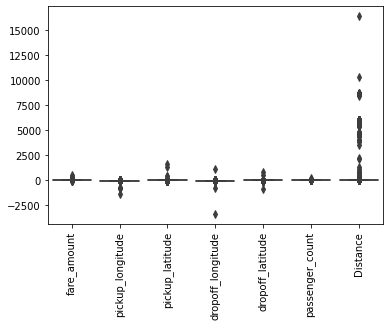

In [11]:
sns.boxplot(data=uber_2)
plt.xticks(rotation=90)

## handle outlier

In [12]:
uber_2.drop(uber_2[uber_2['Distance'] > 60].index, inplace = True)
uber_2.drop(uber_2[uber_2['Distance'] == 0].index, inplace = True)
uber_2.drop(uber_2[uber_2['fare_amount'] == 0].index, inplace = True)
uber_2.drop(uber_2[uber_2['fare_amount'] < 0].index, inplace = True)

In [13]:
uber_2.drop(uber_2[(uber_2['fare_amount']>100) & (uber_2['Distance']<1)].index, inplace = True )
uber_2.drop(uber_2[(uber_2['fare_amount']<100) & (uber_2['Distance']>100)].index, inplace = True )

In [14]:
uber_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193481 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        193481 non-null  float64
 1   pickup_datetime    193481 non-null  object 
 2   pickup_longitude   193481 non-null  float64
 3   pickup_latitude    193481 non-null  float64
 4   dropoff_longitude  193481 non-null  float64
 5   dropoff_latitude   193481 non-null  float64
 6   passenger_count    193481 non-null  int64  
 7   Distance           193481 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 17.3+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'distance vs fare')

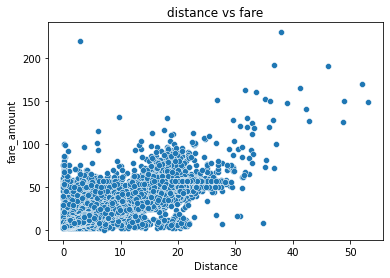

In [15]:
sns.scatterplot(uber_2['Distance'], uber_2['fare_amount'])
plt.title('distance vs fare')

## dealing with data column

In [16]:
uber_2['pickup_datetime'] = pd.to_datetime(uber_2['pickup_datetime'])

uber_2['Year'] = uber_2['pickup_datetime'].apply(lambda time: time.year)
uber_2['Month'] = uber_2['pickup_datetime'].apply(lambda time: time.month)
uber_2['Day'] = uber_2['pickup_datetime'].apply(lambda time: time.day)
uber_2['Day of Week'] = uber_2['pickup_datetime'].apply(lambda time: time.dayofweek)
uber_2['Day of Week_num'] = uber_2['pickup_datetime'].apply(lambda time: time.dayofweek)
uber_2['Hour'] = uber_2['pickup_datetime'].apply(lambda time: time.hour)

day_map = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
uber_2['Day of Week'] = uber_2['Day of Week'].map(day_map)

uber_2['counter'] = 1

In [17]:
uber_2.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,Year,Month,Day,Day of Week,Day of Week_num,Hour,counter
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.68,2015,5,7,Thu,3,19,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.46,2009,7,17,Fri,4,20,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.04,2009,8,24,Mon,0,21,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.66,2009,6,26,Fri,4,8,1
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.48,2014,8,28,Thu,3,17,1


## Average Yearly Trips

Average trips a year: 
[2009, 2010, 2011, 2012, 2013, 2014, 2015] [29674, 29094, 30712, 31138, 30365, 29065, 13433]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'average no of trip')

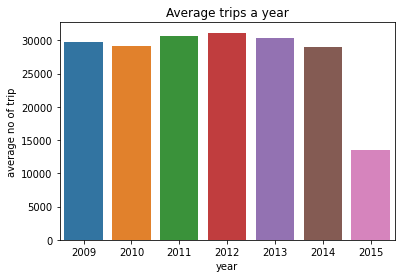

In [18]:
no_of_trips = []
year = [2009, 2010, 2011, 2012, 2013, 2014, 2015]

for i in range(2009, 2016):
    x = uber_2.loc[uber_2['Year'] == i, 'counter'].sum()
    no_of_trips.append(x)

print("Average trips a year: ")
print(year, no_of_trips)

sns.barplot(year, no_of_trips);
plt.title('Average trips a year')
plt.xlabel('year')
plt.ylabel('average no of trip')

## Average Monthly Trips

Average trips a Month: 
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] [17126, 16141, 18165, 18004, 18259, 17210, 14583, 13664, 14772, 15690, 14824, 15043]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'average no of trip')

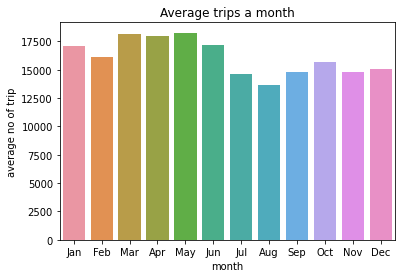

In [19]:
no_of_trips = []
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for i in range(1, 13):
    x = uber_2.loc[uber_2['Month'] == i, 'counter'].sum()
    no_of_trips.append(x)

print("Average trips a Month: ")
print(month, no_of_trips)

sns.barplot(month, no_of_trips)
plt.title('Average trips a month')
plt.xlabel('month')
plt.ylabel('average no of trip')

## Average Daily Trips

Average trips by Days: 
['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] [24377, 27236, 28084, 29041, 29865, 29306, 25572]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'average no of trip')

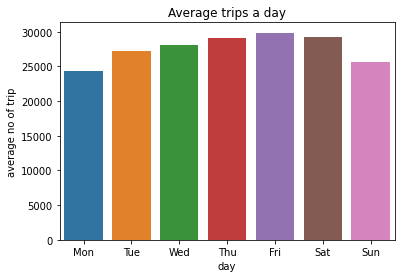

In [20]:
no_of_trips = []
day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

for i in range(0, 7):
    x = uber_2.loc[uber_2['Day of Week_num'] == i, 'counter'].sum()
    no_of_trips.append(x)

print("Average trips by Days: ")
print(day, no_of_trips)

sns.barplot(day, no_of_trips)
plt.title('Average trips a day')
plt.xlabel('day')
plt.ylabel('average no of trip')

## Rides vs Time

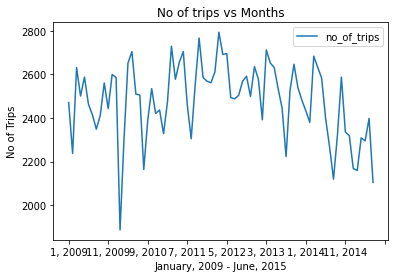

In [21]:
year_vs_trips = uber_2.groupby(['Year','Month']).agg( 
    no_of_trips = ('counter','count'),
    Average_fair = ('fare_amount','mean'),
    Total_fair = ('fare_amount','sum'),
    Avg_distance = ( 'Distance', 'mean')).reset_index()

year_vs_trips['avg_no_of_trips'] = year_vs_trips['no_of_trips']/30
year_vs_trips['month_year'] = year_vs_trips['Month'].astype(str) +", "+ year_vs_trips['Year'].astype(str)


year_vs_trips = year_vs_trips.reset_index()

year_vs_trips.head()


year_vs_trips.plot(kind='line',x='month_year',y='no_of_trips', xlabel='January, 2009 - June, 2015',
    ylabel='No of Trips', title='No of trips vs Months')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


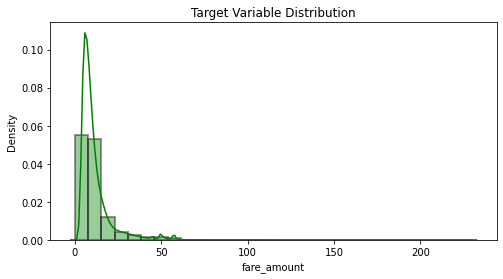

In [22]:
plt.figure(figsize=[8,4])
sns.distplot(uber_2['fare_amount'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution')
plt.show()

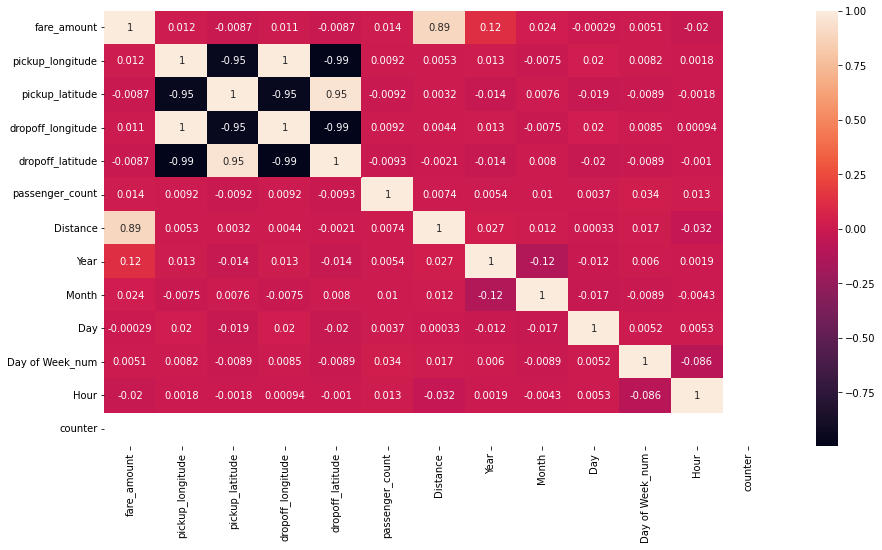

In [23]:
plt.figure(figsize=[15,8])
sns.heatmap(uber_2.corr(),annot=True)

## As we can see from the above heatmap there is a high corroletion between fare and distance

In [24]:
X = uber_2['Distance'].values.reshape(-1, 1)       
y = uber_2['fare_amount'].values.reshape(-1, 1)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [27]:
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(x_train_scaled, y_train)

print("Training set score: {:.2f}".format(l_reg.score(x_train_scaled, y_train)))
print("Test set score: {:.7f}".format(l_reg.score(x_test_scaled, y_test)))

Training set score: 0.80
Test set score: 0.7968219


In [28]:
y_pred = l_reg.predict(x_test_scaled)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.3163743495473237
Mean Squared Error: 18.841592163794548
Root Mean Squared Error: 4.340690286555186


In [29]:
print(l_reg.intercept_)
print(l_reg.coef_)

[11.29535624]
[[8.45711801]]


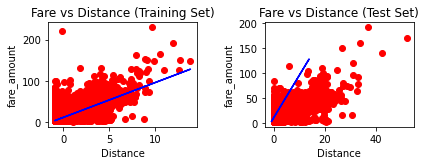

In [30]:
plt.subplot(2, 2, 1)
plt.scatter(x_train_scaled, y_train, color = 'red')
plt.plot(x_train_scaled, l_reg.predict(x_train_scaled), color ="blue")
plt.title("Fare vs Distance (Training Set)")
plt.ylabel("fare_amount")
plt.xlabel("Distance")

plt.subplot(2, 2, 2)
plt.scatter(X_test, y_test, color = 'red')
plt.plot(x_train_scaled, l_reg.predict(x_train_scaled), color ="blue")
plt.ylabel("fare_amount")
plt.xlabel("Distance")
plt.title("Fare vs Distance (Test Set)")


plt.tight_layout()
plt.rcParams["figure.figsize"] = (32,22)
plt.show()

## apply Ridge

In [31]:
from sklearn.linear_model import Ridge
r  = Ridge()
r.fit(x_train_scaled, y_train)

print("Training set score: {:.2f}".format(r.score(x_train_scaled, y_train)))
print("Test set score: {:.7f}".format(r.score(x_test_scaled, y_test)))

Training set score: 0.80
Test set score: 0.7968218


In [32]:
y_pred = r.predict(x_test_scaled)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.3163764985341597
Mean Squared Error: 18.841599161152782
Root Mean Squared Error: 4.340691092574175


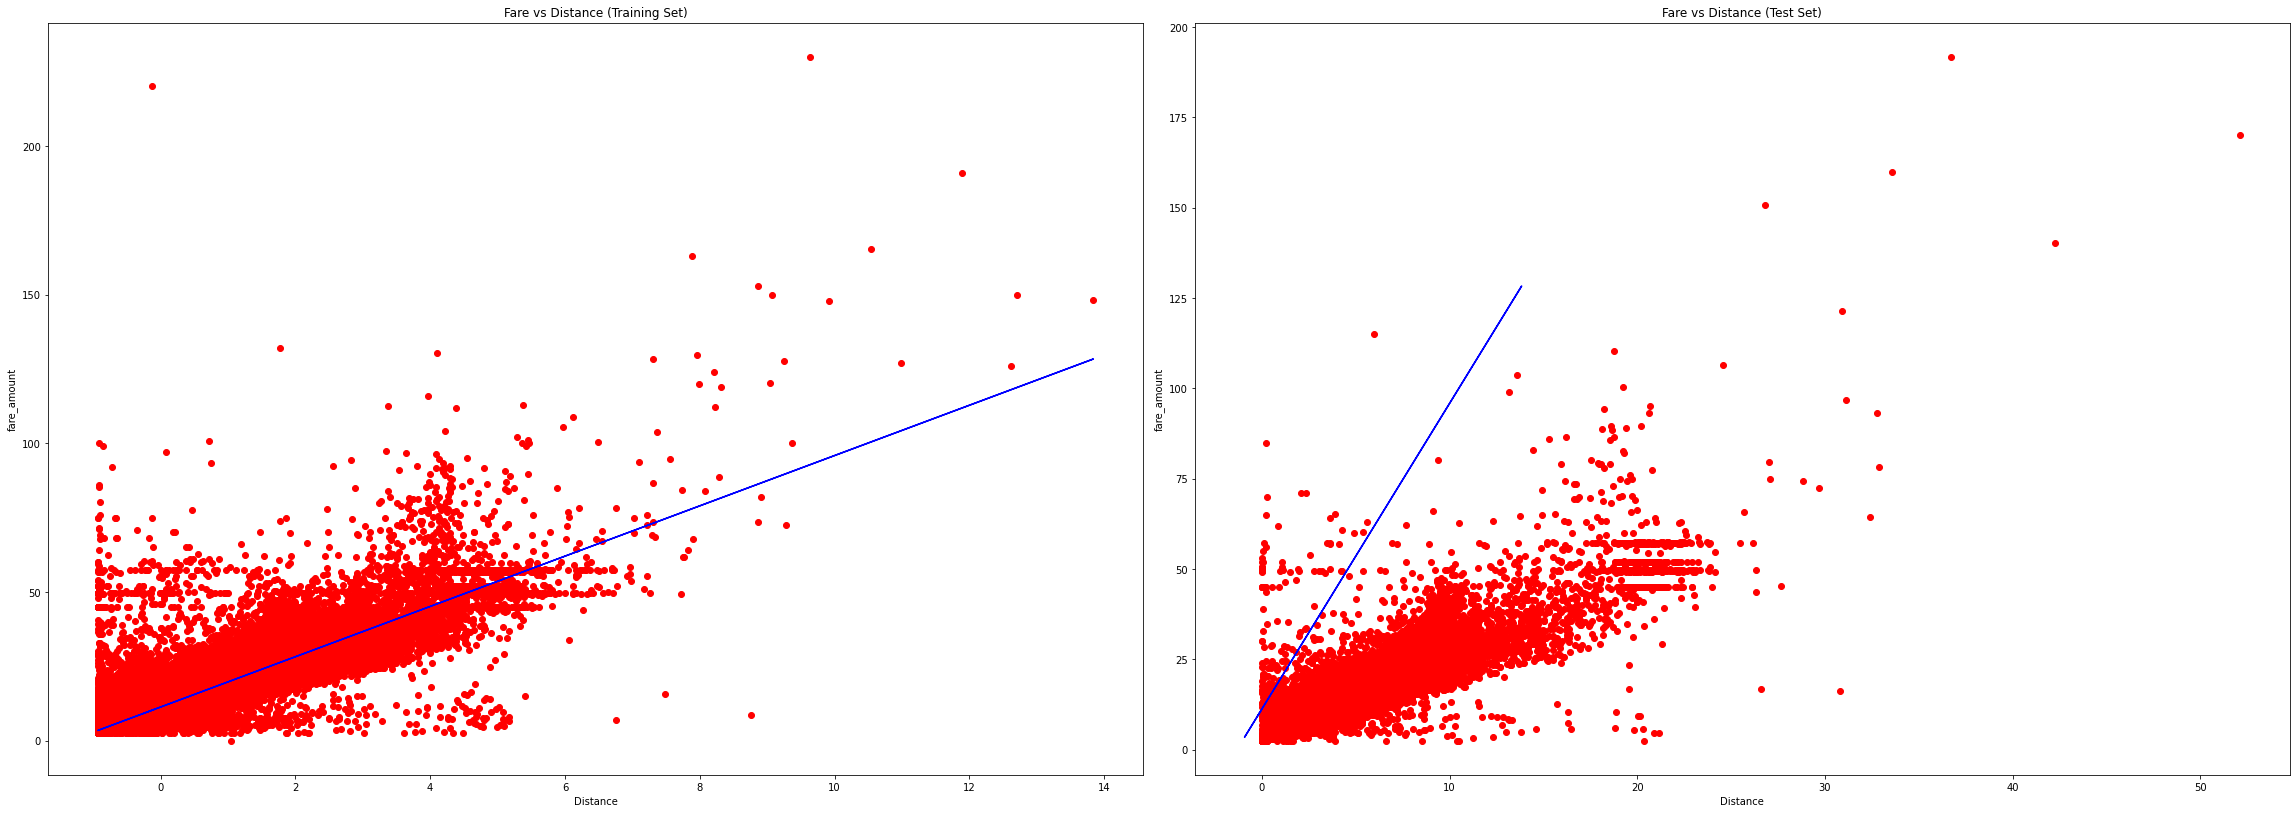

In [33]:
plt.subplot(2, 2, 1)
plt.scatter(x_train_scaled, y_train, color = 'red')
plt.plot(x_train_scaled, r.predict(x_train_scaled), color ="blue")
plt.title("Fare vs Distance (Training Set)")
plt.ylabel("fare_amount")
plt.xlabel("Distance")

plt.subplot(2, 2, 2)
plt.scatter(X_test, y_test, color = 'red')
plt.plot(x_train_scaled, r.predict(x_train_scaled), color ="blue")
plt.ylabel("fare_amount")
plt.xlabel("Distance")
plt.title("Fare vs Distance (Test Set)")


plt.tight_layout()
plt.rcParams["figure.figsize"] = (32,22)
plt.show()

## Decision Tree

In [40]:
from sklearn.tree import DecisionTreeRegressor
dt  = DecisionTreeRegressor(max_depth=4)
dt.fit(x_train_scaled, y_train)

print("Training set score: {:.2f}".format(dt.score(x_train_scaled, y_train)))
print("Test set score: {:.7f}".format(dt.score(x_test_scaled, y_test)))

Training set score: 0.80
Test set score: 0.7997811


[Text(0.5, 0.9, 'X[0] <= 1.309\nsquared_error = 89.659\nsamples = 154784\nvalue = 11.295'),
 Text(0.25, 0.7, 'X[0] <= -0.021\nsquared_error = 25.333\nsamples = 142320\nvalue = 9.211'),
 Text(0.125, 0.5, 'X[0] <= -0.453\nsquared_error = 12.037\nsamples = 105757\nvalue = 7.391'),
 Text(0.0625, 0.3, 'X[0] <= -0.611\nsquared_error = 10.109\nsamples = 59409\nvalue = 6.103'),
 Text(0.03125, 0.1, 'squared_error = 13.935\nsamples = 32047\nvalue = 5.517'),
 Text(0.09375, 0.1, 'squared_error = 4.754\nsamples = 27362\nvalue = 6.789'),
 Text(0.1875, 0.3, 'X[0] <= -0.291\nsquared_error = 9.659\nsamples = 46348\nvalue = 9.041'),
 Text(0.15625, 0.1, 'squared_error = 6.105\nsamples = 22090\nvalue = 8.153'),
 Text(0.21875, 0.1, 'squared_error = 11.524\nsamples = 24258\nvalue = 9.85'),
 Text(0.375, 0.5, 'X[0] <= 0.591\nsquared_error = 26.473\nsamples = 36563\nvalue = 14.477'),
 Text(0.3125, 0.3, 'X[0] <= 0.274\nsquared_error = 17.422\nsamples = 25358\nvalue = 12.906'),
 Text(0.28125, 0.1, 'squared_error

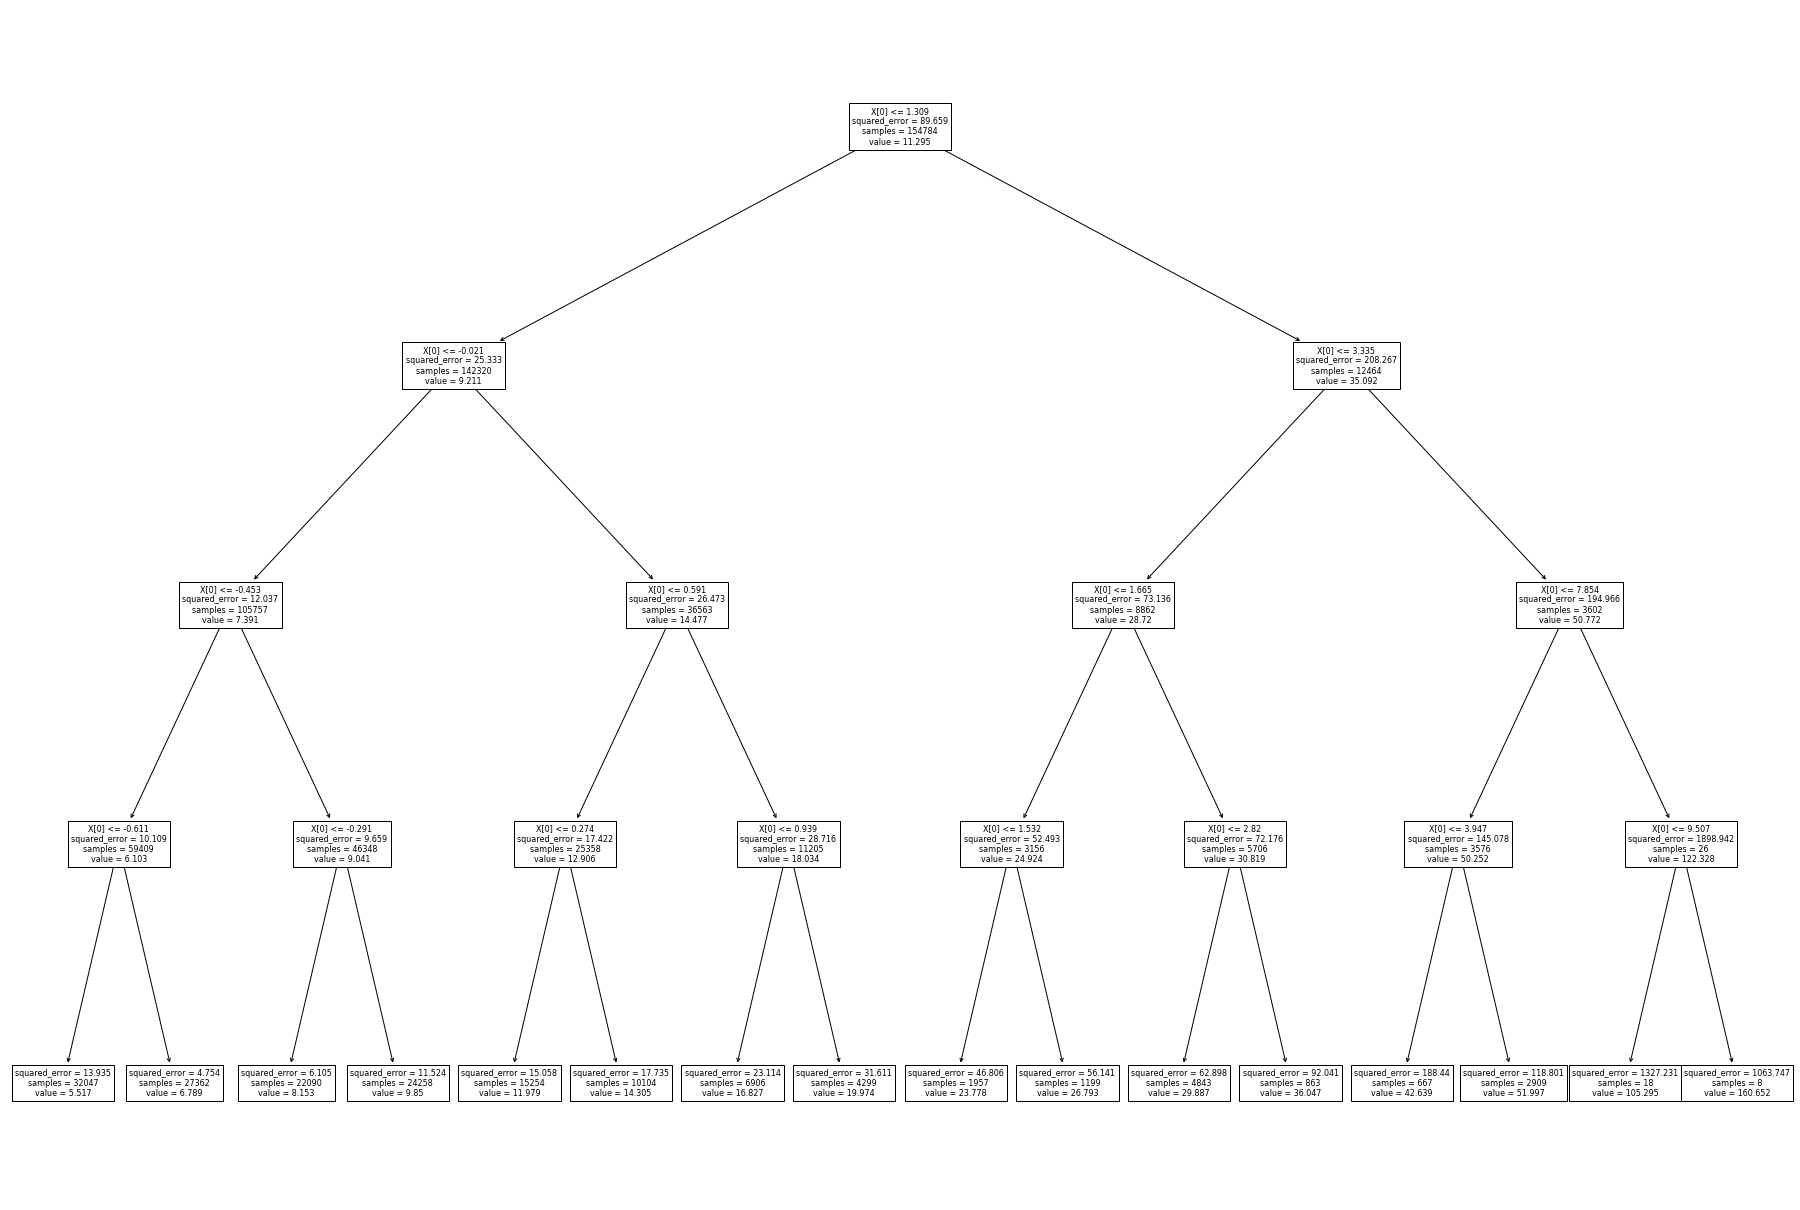

In [43]:
from sklearn.tree import plot_tree
plot_tree(dt)

In [41]:
y_pred = dt.predict(x_test_scaled)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.3491251544893403
Mean Squared Error: 18.567177865496202
Root Mean Squared Error: 4.308964825279524


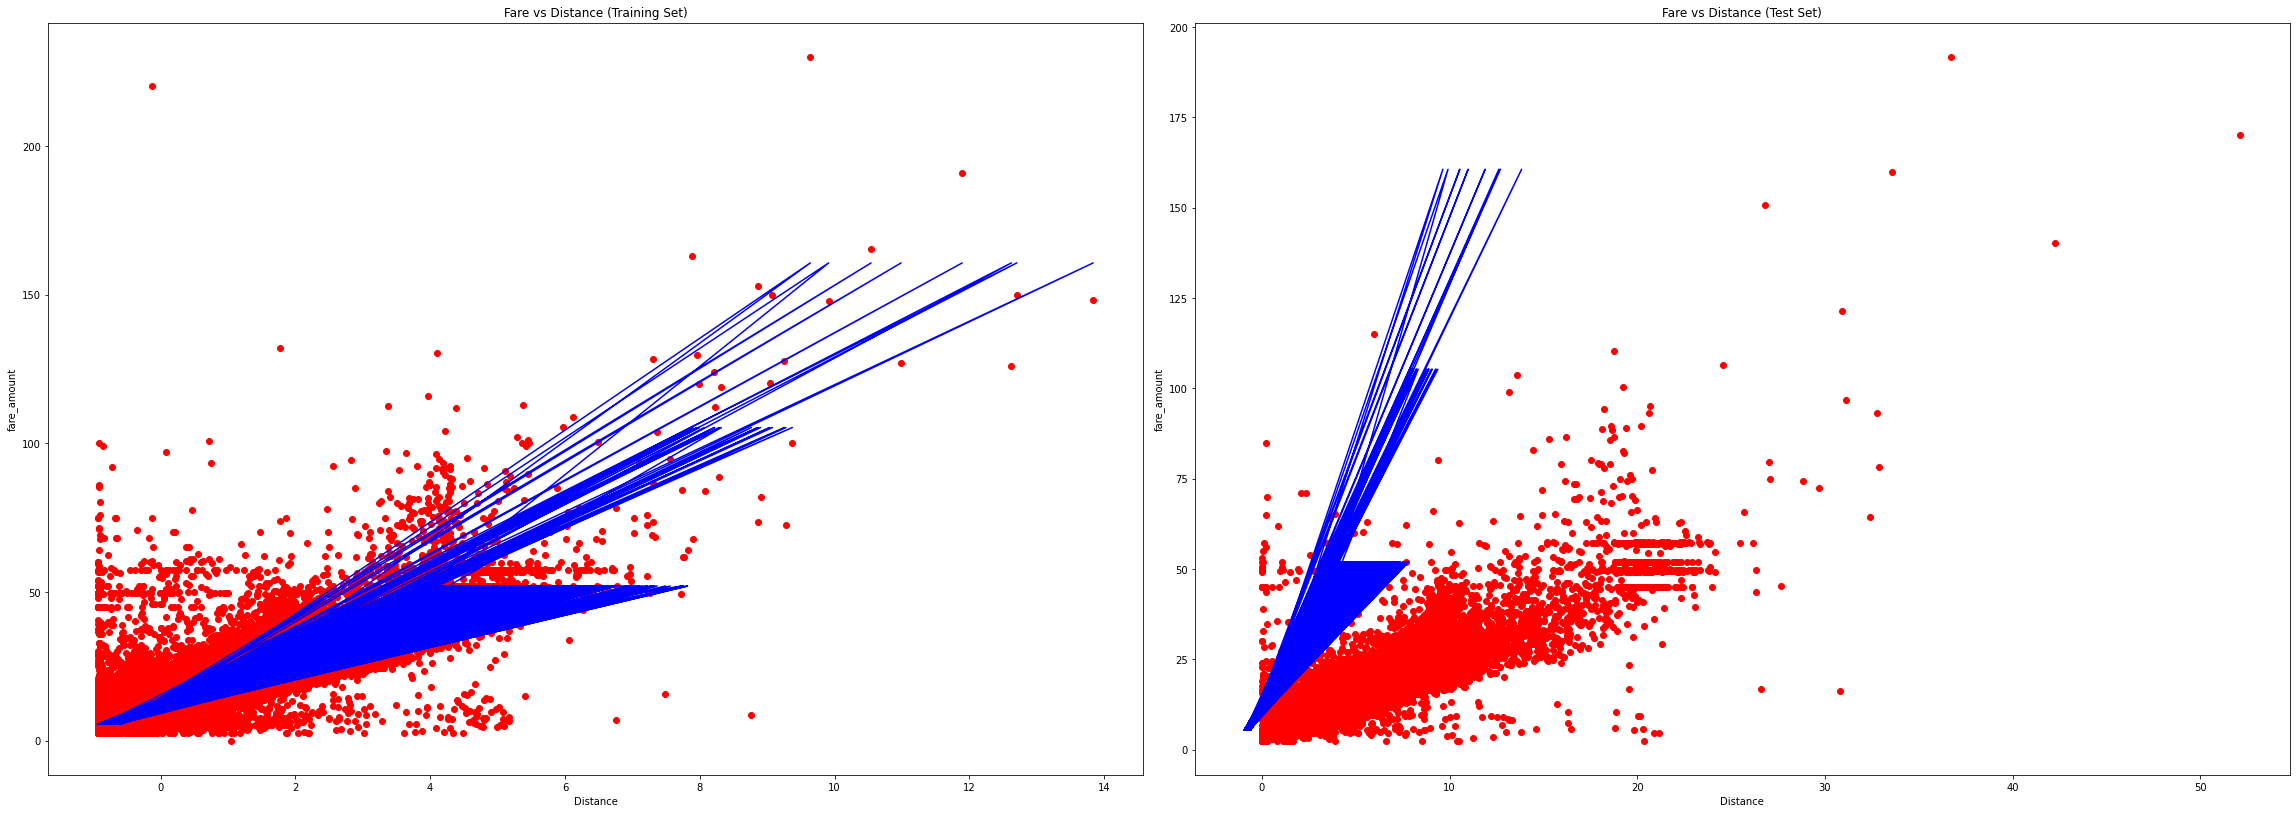

In [42]:
plt.subplot(2, 2, 1)
plt.scatter(x_train_scaled, y_train, color = 'red')
plt.plot(x_train_scaled, dt.predict(x_train_scaled), color ="blue")
plt.title("Fare vs Distance (Training Set)")
plt.ylabel("fare_amount")
plt.xlabel("Distance")

plt.subplot(2, 2, 2)
plt.scatter(X_test, y_test, color = 'red')
plt.plot(x_train_scaled, dt.predict(x_train_scaled), color ="blue")
plt.ylabel("fare_amount")
plt.xlabel("Distance")
plt.title("Fare vs Distance (Test Set)")


plt.tight_layout()
plt.rcParams["figure.figsize"] = (32,22)
plt.show()

## random forest

In [37]:
from sklearn.ensemble import RandomForestRegressor
rf  = RandomForestRegressor()
rf.fit(x_train_scaled, y_train)

print("Training set score: {:.2f}".format(rf.score(x_train_scaled, y_train)))
print("Test set score: {:.7f}".format(rf.score(x_test_scaled, y_test)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Training set score: 0.82
Test set score: 0.7919920


In [38]:
y_pred = rf.predict(x_test_scaled)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.3522473533348687
Mean Squared Error: 19.28949234016607
Root Mean Squared Error: 4.391980457625702


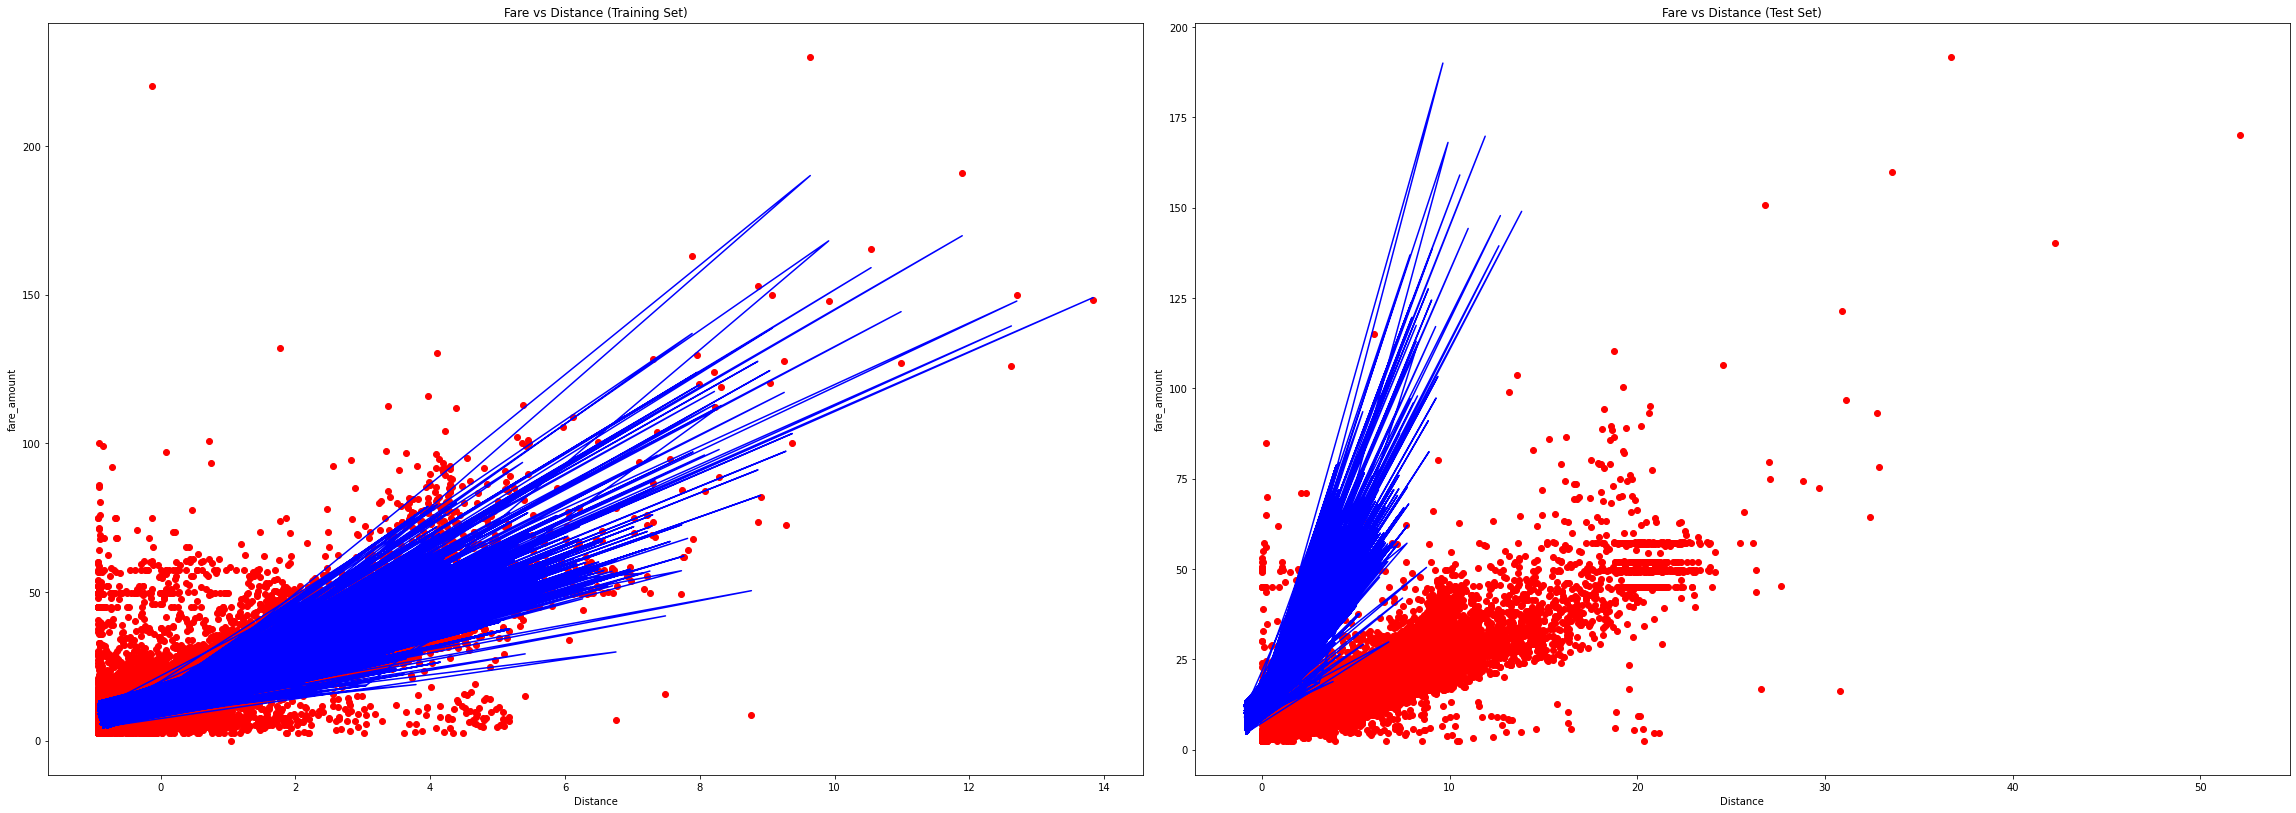

In [39]:
plt.subplot(2, 2, 1)
plt.scatter(x_train_scaled, y_train, color = 'red')
plt.plot(x_train_scaled, rf.predict(x_train_scaled), color ="blue")
plt.title("Fare vs Distance (Training Set)")
plt.ylabel("fare_amount")
plt.xlabel("Distance")

plt.subplot(2, 2, 2)
plt.scatter(X_test, y_test, color = 'red')
plt.plot(x_train_scaled, rf.predict(x_train_scaled), color ="blue")
plt.ylabel("fare_amount")
plt.xlabel("Distance")
plt.title("Fare vs Distance (Test Set)")


plt.tight_layout()
plt.rcParams["figure.figsize"] = (32,22)
plt.show()